In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings

In [9]:
df = pd.read_excel("sales.xlsx")

In [3]:
#Checking the first 5 rows of the dataset
df.head(5)

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [10]:
#Shape of the dataset
r,c = df.shape

print(f"Number of colimns {c} and number of rows {r}")

Number of colimns 21 and number of rows 51290


In [11]:
#Checking for null values
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [12]:
d = df.drop(["order_id","customer_name", "market", "product_id","order_priority","year"],axis = 1)

In [13]:
d.head(5)

,order_date,ship_date,ship_mode,segment,state,country,region,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost
0,2011-01-01,2011-01-06,Standard Class,Consumer,Constantine,Algeria,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46
1,2011-01-01,2011-01-08,Standard Class,Consumer,New South Wales,Australia,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72
2,2011-01-01,2011-01-05,Second Class,Consumer,Budapest,Hungary,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17
3,2011-01-01,2011-01-05,Second Class,Home Office,Stockholm,Sweden,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82
4,2011-01-01,2011-01-08,Standard Class,Consumer,New South Wales,Australia,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70


In [116]:
#finding the data types
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_date     51290 non-null  datetime64[ns]
 1   ship_date      51290 non-null  datetime64[ns]
 2   ship_mode      51290 non-null  object        
 3   segment        51290 non-null  object        
 4   state          51290 non-null  object        
 5   country        51290 non-null  object        
 6   region         51290 non-null  object        
 7   category       51290 non-null  object        
 8   sub_category   51290 non-null  object        
 9   product_name   51290 non-null  object        
 10  sales          51290 non-null  float64       
 11  quantity       51290 non-null  int64         
 12  discount       51290 non-null  float64       
 13  profit         51290 non-null  float64       
 14  shipping_cost  51290 non-null  float64       
 15  month_year     5129

In [15]:
#Describing the data
d.describe()

,sales,quantity,discount,profit,shipping_cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818
std,487.565361,2.278766,0.212280,174.424113,57.296810
min,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


# Overall sales trend

In [18]:
d["month_year"] = d["order_date"].apply( lambda x:x.strftime("%y-%m"))

In [26]:
d.drop(["order_date","ship_date"],axis = 1)

,ship_mode,segment,state,country,region,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,month_year
0,Standard Class,Consumer,Constantine,Algeria,Africa,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.1400,35.460,11-01
1,Standard Class,Consumer,New South Wales,Australia,Oceania,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.0360,9.720,11-01
2,Second Class,Consumer,Budapest,Hungary,EMEA,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.6400,8.170,11-01
3,Second Class,Home Office,Stockholm,Sweden,North,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.0550,4.820,11-01
4,Standard Class,Consumer,New South Wales,Australia,Oceania,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.7700,4.700,11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,Standard Class,Corporate,California,United States,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,14-12
51286,Standard Class,Consumer,Souss-Massa-Draâ,Morocco,Africa,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,14-12
51287,Second Class,Consumer,Managua,Nicaragua,Central,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,14-12
51288,Standard Class,Consumer,Chihuahua,Mexico,North,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,14-12


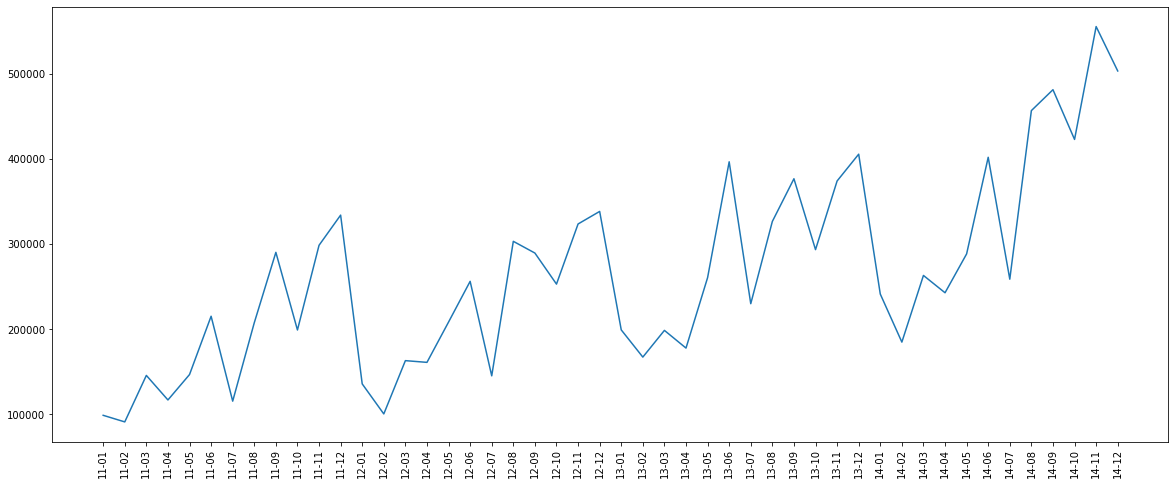

In [133]:
#a line chart to describe the trend of the sales
plt.figure(figsize = (20,8))
m_y_s = d.groupby("month_year").sum()["sales"].reset_index()

plt.plot(m_y_s["month_year"],m_y_s["sales"])
plt.xticks(rotation = "vertical",size = 10)
plt.show()

# Which are the top ten products by sales? 


product_name
Apple Smart Phone, Full Size                                86935.7786
Cisco Smart Phone, Full Size                                76441.5306
Motorola Smart Phone, Full Size                             73156.3030
Nokia Smart Phone, Full Size                                71904.5555
Canon imageCLASS 2200 Advanced Copier                       61599.8240
Hon Executive Leather Armchair, Adjustable                  58193.4841
Office Star Executive Leather Armchair, Adjustable          50661.6840
Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
Samsung Smart Phone, Cordless                               48653.4600
Nokia Smart Phone, with Caller ID                           47877.7857
Name: sales, dtype: float64


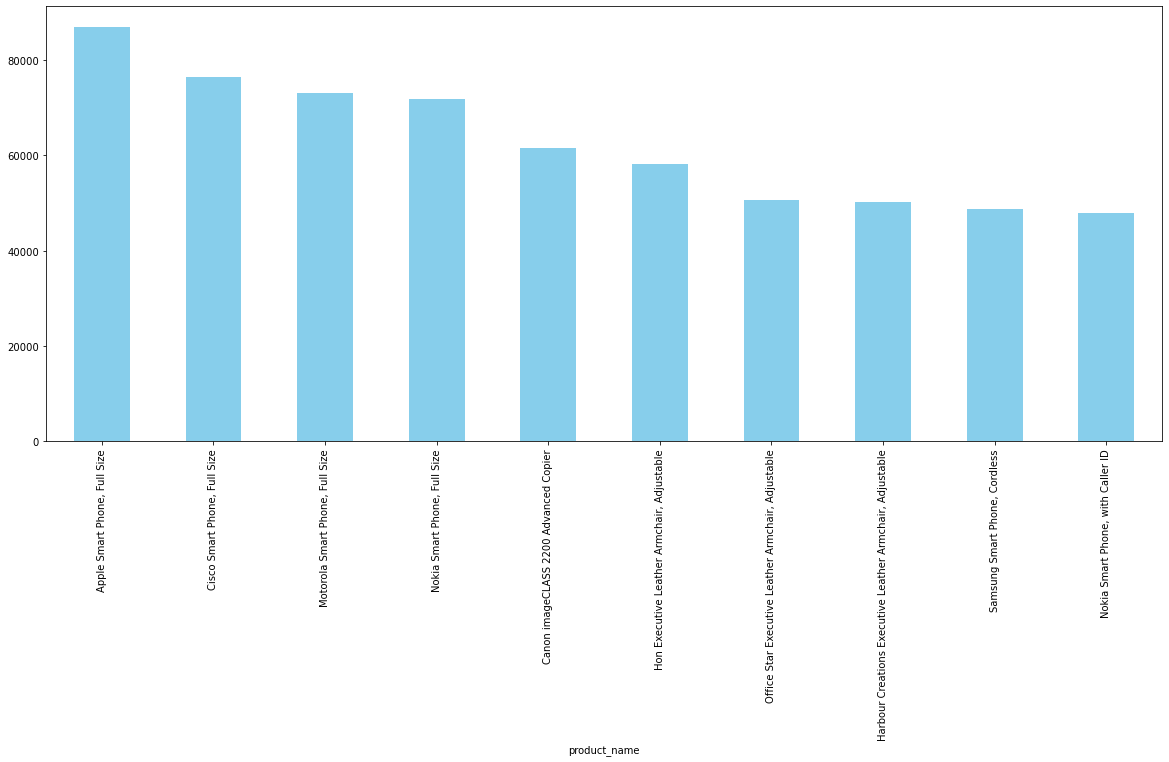

In [132]:
sales = d.groupby(["product_name"]).sum()["sales"]
sales.sort_values(ascending=False).head(10).plot(kind="bar", figsize=(20,8), color = "skyblue")
print(sales.sort_values(ascending=False).head(10))
plt.show()

# Most Selling Products by quantity


product_name
Staples                                  876
Cardinal Index Tab, Clear                337
Eldon File Cart, Single Width            321
Rogers File Cart, Single Width           262
Sanford Pencil Sharpener, Water Color    259
Stockwell Paper Clips, Assorted Sizes    253
Avery Index Tab, Clear                   252
Ibico Index Tab, Clear                   251
Smead File Cart, Single Width            250
Stanley Pencil Sharpener, Water Color    242
Name: quantity, dtype: int64


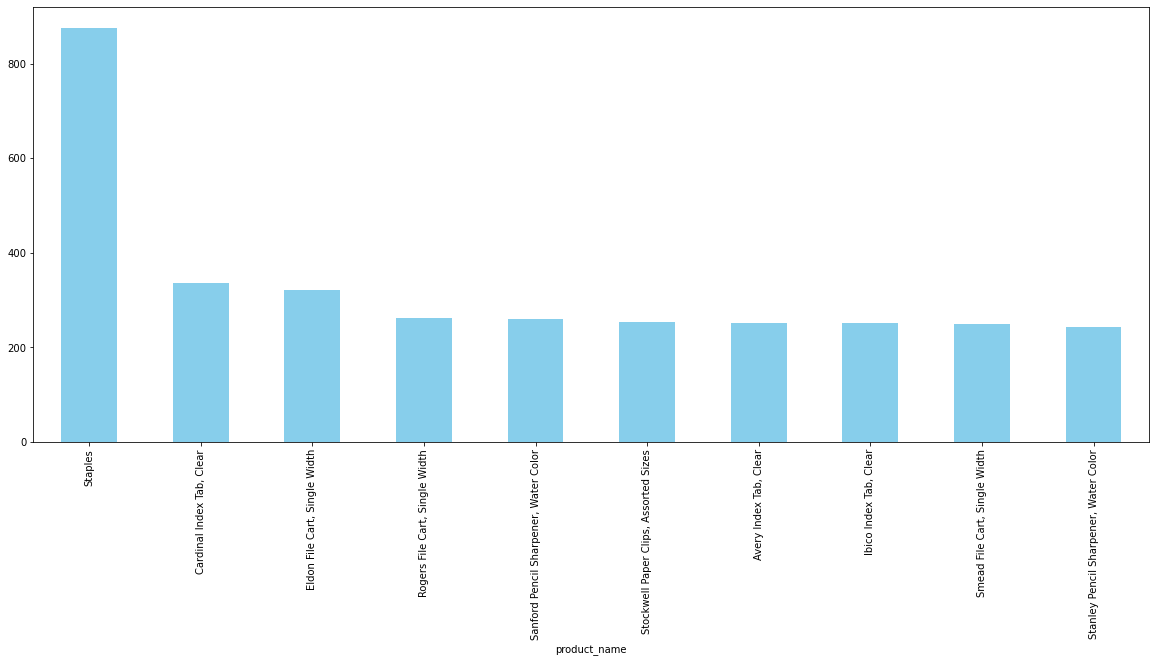

In [131]:
quan = d.groupby(["product_name"]).sum()["quantity"]
quan.sort_values(ascending=False).head(10).plot(kind="bar", figsize=(20,8), color = "skyblue")
print(quan.sort_values(ascending=False).head(10))

# Most profitable products 

product_name
Canon imageCLASS 2200 Advanced Copier                       25199.9280
Cisco Smart Phone, Full Size                                17238.5206
Motorola Smart Phone, Full Size                             17027.1130
Hoover Stove, Red                                           11807.9690
Sauder Classic Bookcase, Traditional                        10672.0730
Harbour Creations Executive Leather Armchair, Adjustable    10427.3260
Nokia Smart Phone, Full Size                                 9938.1955
Cisco Smart Phone, with Caller ID                            9786.6408
Nokia Smart Phone, with Caller ID                            9465.3257
Belkin Router, USB                                           8955.0180
Name: profit, dtype: float64


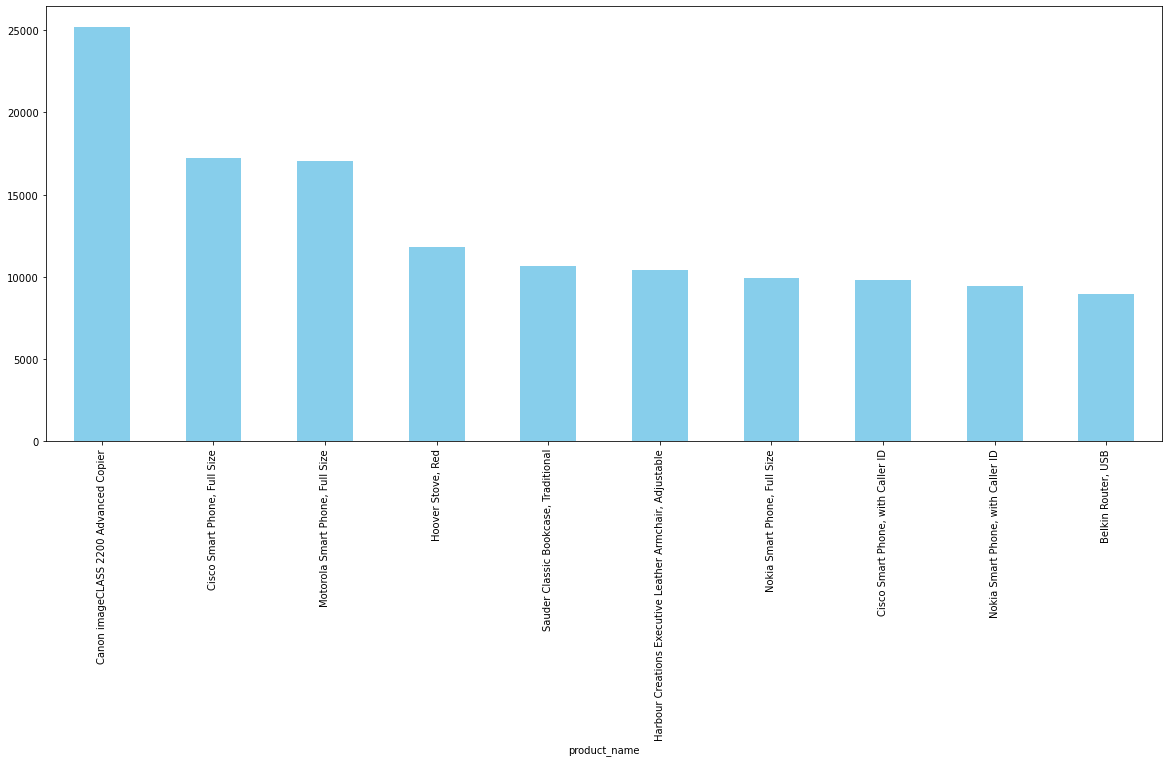

In [130]:
profit = d.groupby(["product_name"]).sum()["profit"]
profit.sort_values(ascending=False).head(10).plot(kind="bar", figsize=(20,8), color = "skyblue")
print(profit.sort_values(ascending=False).head(10))

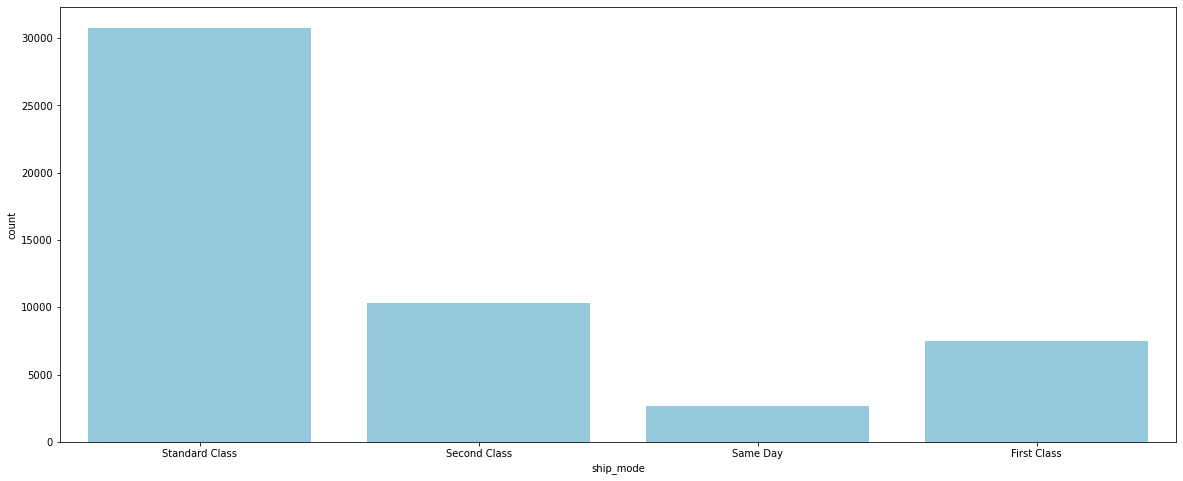

In [129]:
warnings.simplefilter(action="ignore", category=FutureWarning)
plt.figure(figsize = (20,8))
sn.countplot(d["ship_mode"],color = "skyblue")
plt.show()

# Most sold products by catagories and sub catagories

category         sub_category
Office Supplies  Binders         21429
                 Storage         16917
                 Art             16301
                 Paper           12822
Furniture        Chairs          12336
Technology       Phones          11870
Furniture        Furnishings     11225
Technology       Accessories     10946
Office Supplies  Labels           9322
                 Supplies         8543
Name: quantity, dtype: int64


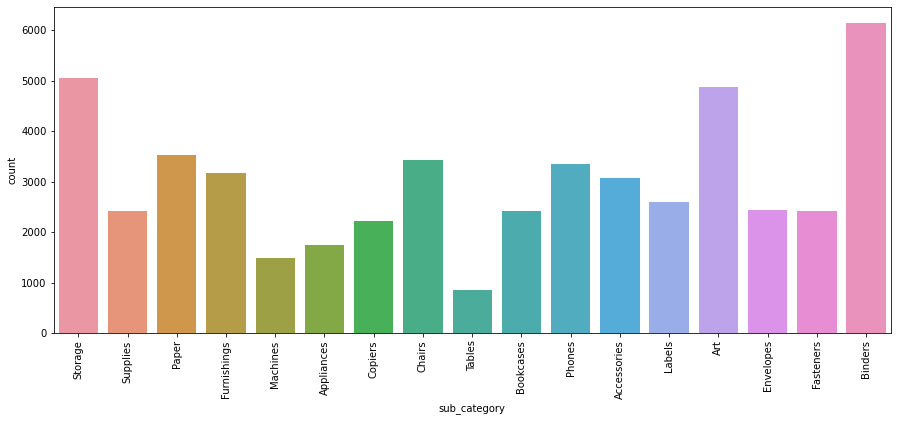

In [127]:

warnings.simplefilter(action="ignore", category=FutureWarning)


catagories = d.groupby(["category","sub_category"]).sum()["quantity"]
sorted_cat = catagories.sort_values(ascending=False).head(10)
print(sorted_cat)
plt.figure(figsize = (15,6))
plt.xticks(rotation = "vertical",size = 10)
#sn.countplot(d["category"])
sn.countplot(d["sub_category"])
plt.show()

# Top ten locations by sales


state
England                   485170.9710
California                457687.6315
Ile-de-France             317822.5440
New York                  310876.2710
New South Wales           270487.1040
Queensland                238312.7340
North Rhine-Westphalia    216451.8510
Texas                     170188.0458
San Salvador              153639.3970
National Capital          152175.3555
Name: sales, dtype: float64


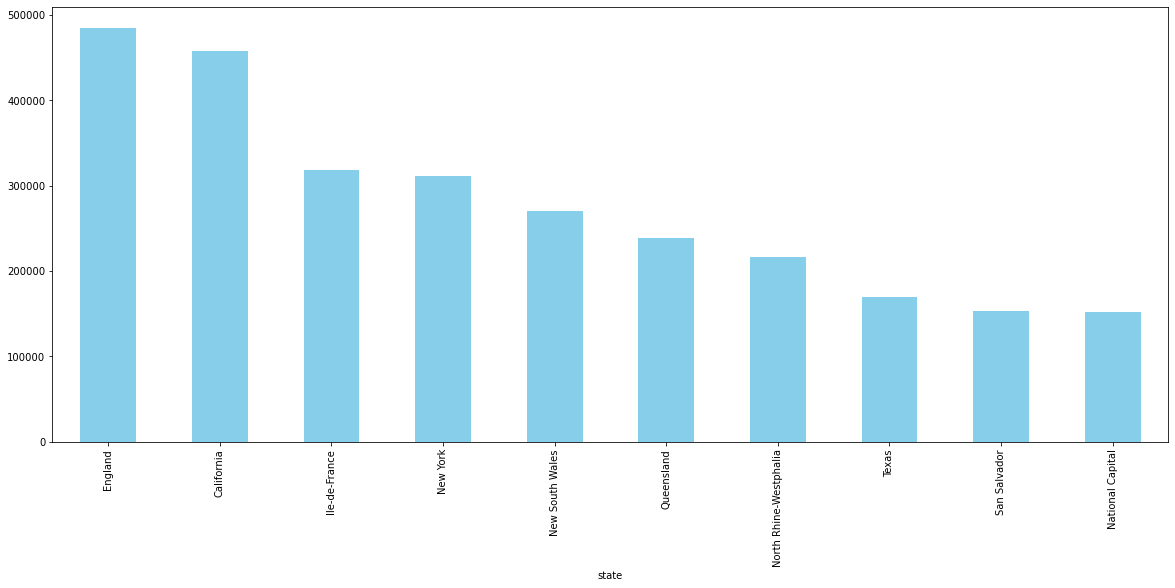

In [135]:
loc = d.groupby(["state"]).sum()["sales"]
loc = loc.sort_values(ascending=False).head(10)
print(loc)
loc.plot(kind="bar", figsize=(20,8), color = "skyblue")
plt.show()